# Methodology
We dive more deeply into the algorithms implemented in CausalML. To provid a basis for the discussion, we review some of the frameworks and definitions used in the literature

We use the Neyman-Rubin potential outcomes framework and assume Y represent outcome, W represents the treatment assignment, and X_i as the observed covariate (may be confounder or not)

## Supported Algorithm
1. Tree-based algorithms
    - Uplift Random Forests on KL divergence, Euclidean Distance, and Chi-Square
    - Uplift Random Forests on Contextual Treatment Selection
    - Uplift Random Forests on delta-delta-p criterion (only for binary trees and two class problems)
    - Uplift Random Forests on IDDP (only for binary trees and two-class problems)
    - Interaction Tree (only for binary trees and two-class problems)
    - Causal Inference Tree (only for binary trees and two-class problems)
2. Meta-learner algorithms
    - S-Learner
    - T-Learner
    - X-Learner
    - R-Learner
    - Doubly Robust (DR) Learner
3. Instrumental variables algorithms
    - 2-Stage Least Squares (2SLS)
    - Doubly Robust Instrumental Variable (DRIV) Learner
4. Neural Network based algorithms
    - CEVAE
    - DragonNet
5. Treatment Optimization algorithm
    - Counterfactual Unit Selection
    - Counterfactual Value Estimation

## 2. Meta-learner algorithms

A meta-algorithm (or meta-learner) is **a framework to estimate the Conditional Average Treatment Effect (CATE) using any machine learning estimator** (also called base learners)

A meta-algorithm uses either:
a. a single base learner while having the treatment indicator as a feature (e.g. S-learner)
b. multiple base learners separately for each of the treatment and control groups (e.g. T-Learner, X-Learner, and R-Learner)

Convidence intervals of average treatment effect estimates are calculated based on the lower bound formula

### S-Learner
S-learner estimates the treatment effect using a single machine learning model as follows:

- Stage 1 -> Estimate the average outcomes miu(x) with covariates X and an indicator variable for treatment W using a machine learning model \
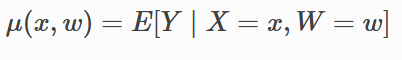

- Stage 2 -> Define the CATE estimate as:
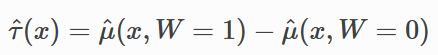 \
Including the propensity score in the model can reduce bias from regularization induced confounding

When the control and treatment groups are very different in covariates, a single linear model is not sufficient to encode the different relevant dimensions and smoothness of features for the control treatment groups

### T-Learner
T-learner consists of two stages as follows:
- Stage 1 -> Estimate the average outcomes miu0(x) and miu1(x) using machine learning models: \
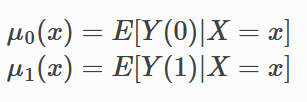

- Stage 2 -> Define the CATE estimate as: \
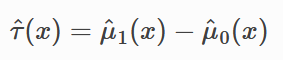

It is the same as using machine learning model to estimate for each control and treatment average outcome. Then, both outcome is substracted

### X-Learner
X-learner is an extension of T-learner, and consist of 3 stages as follows:

- Stage 1 -> Estimate the average outcomes miu0(x) and miu1(x) using machine learning model: \
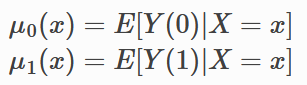

- Stage 2 -> **Impute the user level treatment effects**, Di^1 and Dj^0 for user i in the treatment group based on miu0(x), and user j in the control groups based on miu1(x): \
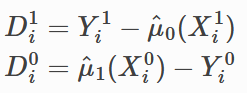

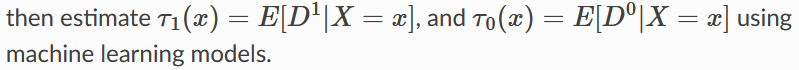

- Stage 3 -> Define the CATE estimate by a weighted average of T1(x) and T0(x):

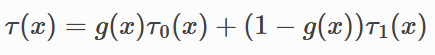

where g is element [0,1]. We can use propensity scores for g(x)

### R-Learner
R-learner uses the cross validation out-of-fold estimates of outcomes m hat ^(-i) (xi) and propensity scores e hat^(-1) (xi). It consist of two stages as follows:
- Stage 1 -> Fit m hat and e hat(x) with machine learning models using **cross-validation**.

- Stage 2 -> Estimate treatment effects by minimising the R-loss, L hat n (T(x)): \
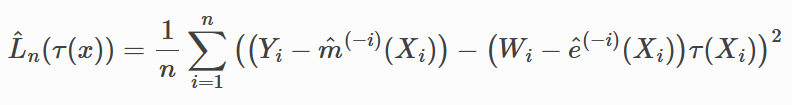

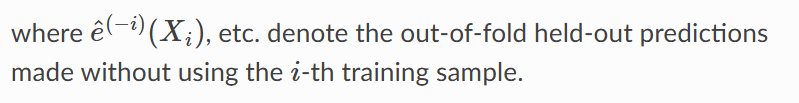


### Doubly Robust (DR) learner

DR-learner estimates the CATE via cross-fitting a doubly-robust score function in two stages as follows. We start by randomly split the data {Y,X,W} into 3 partitions {Y^i, X^i, W^i}, i = {1,2,3}

- Stage 1
Fit a propensity score model e^